In [0]:
import nltk, re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.tokenize import WordPunctTokenizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

**Train dataset and Test dataset**

In [0]:
clean_df = pd.read_csv('clean_data.csv')

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(clean_df['text_final'], clean_df['Tag'], test_size=0.3)

In [0]:
def accuracy_summary(pipeline, Train_X, Test_X, Train_Y, Test_Y):
    if len(Test_X[Test_Y == 0]) / (len(Test_X)*1.) > 0.5:
        null_accuracy = len(Test_X[Test_Y == 0]) / (len(Test_X)*1.)
    else:
        null_accuracy = 1. - (len(Test_X[Test_Y == 0]) / (len(Test_X)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(Train_X, Train_Y)
    y_pred = sentiment_fit.predict(Test_X)
    train_test_time = time() - t0
    accuracy = accuracy_score(Test_Y, y_pred)
    print("null accuracy: {0:.2f}% ".format(null_accuracy*100))
    print("accuracy score: {0:.2f}".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [0]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,10000,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, Train_X, Test_X, Train_Y, Test_Y)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [5]:
tvec = TfidfVectorizer()

feature_unigram = nfeature_accuracy_checker(vectorizer=tvec)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 2000 features
null accuracy: 100.00% 
accuracy score: 81.63
model is 18.37% less accurate than null accuracy
train and test time: 0.15s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 81.21
model is 18.79% less accurate than null accuracy
train and test time: 0.15s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 100.00% 
accuracy score: 81.44
model is 18.56% less accurate than null accuracy
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 81.21
model is 18.79% less accurate than null accuracy
train and test time: 0.15s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 100.00% 
accuracy score: 80.98
model is 19.02% less accurate than null accuracy
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 80.90
model is 19.10% less accurate than null accuracy
train and test time: 0.15s
--------------------------------------------------------------------------------
Validation result for 8000 features
null accuracy: 100.00% 
accuracy score: 80.90
model is 19.10% less accurate than null accuracy
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for 9000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 80.90
model is 19.10% less accurate than null accuracy
train and test time: 0.15s
--------------------------------------------------------------------------------


In [6]:
feature_bigram = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 2000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 80.60
model is 19.40% less accurate than null accuracy
train and test time: 0.29s
--------------------------------------------------------------------------------
Validation result for 3000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 80.21
model is 19.79% less accurate than null accuracy
train and test time: 0.29s
--------------------------------------------------------------------------------
Validation result for 4000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 80.25
model is 19.75% less accurate than null accuracy
train and test time: 0.30s
--------------------------------------------------------------------------------
Validation result for 5000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 79.95
model is 20.05% less accurate than null accuracy
train and test time: 0.30s
--------------------------------------------------------------------------------
Validation result for 6000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 79.79
model is 20.21% less accurate than null accuracy
train and test time: 0.29s
--------------------------------------------------------------------------------
Validation result for 7000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 79.75
model is 20.25% less accurate than null accuracy
train and test time: 0.29s
--------------------------------------------------------------------------------
Validation result for 8000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 100.00% 
accuracy score: 79.52
model is 20.48% less accurate than null accuracy
train and test time: 0.32s
--------------------------------------------------------------------------------
Validation result for 9000 features
null accuracy: 100.00% 
accuracy score: 79.41
model is 20.59% less accurate than null accuracy
train and test time: 0.30s
--------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


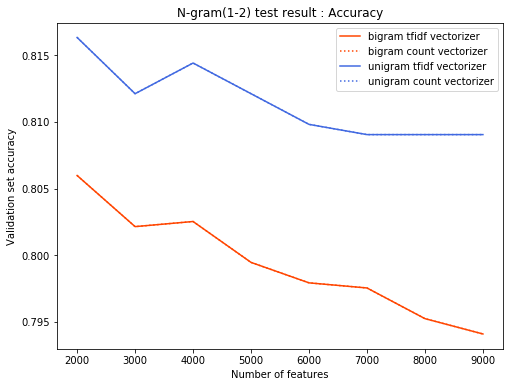

In [7]:
nfeatures_plot_ugt = pd.DataFrame(feature_unigram,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_bigram,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='royalblue')

plt.title("N-gram(1-2) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()

In [0]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=4500)
Tfidf_vect.fit(clean_df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [9]:
print("----------------------- Train Y Tfidf ------------------------------\n")
print(Tfidf_vect.vocabulary_)

print("\n\n\n----------------------- Train X Tfidf ------------------------------\n")
print(Train_X_Tfidf)

----------------------- Train Y Tfidf ------------------------------

{'obsess': 2348, 'frozen': 1439, 'soundtrack': 3685, 'since': 3588, 'see': 3411, 'film': 1354, 'literally': 2024, 'listen': 2019, 'repeat': 3073, 'every': 1244, 'day': 972, 'love': 2058, 'story': 3754, 'felt': 1336, 'charm': 721, 'present': 2678, 'first': 1369, 'one': 2384, 'tune': 4037, 'oh': 2367, 'elsa': 1167, 'cutie': 940, 'babey': 344, 'death': 978, 'disney': 1058, 'ice': 1724, 'cold': 796, 'hard': 1616, 'fact': 1290, 'freeze': 1421, 'rat': 2895, 'xxx': 4464, 'nc': 2288, 'parody': 2446, 'let': 1992, 'go': 1518, 'sequence': 3453, 'perform': 2473, 'idina': 1734, 'menzel': 2169, 'via': 4281, 'leave': 1976, 'like': 2007, 'hey': 1660, 'ho': 1677, 'wan': 4333, 'na': 2272, 'anna': 170, 'content': 857, 'twitter': 4047, 'lol': 2037, 'punk': 2794, 'illustration': 1745, 'best': 518, 'part': 2447, 'thing': 3904, 'really': 2929, 'script': 3386, 'im': 1747, 'talk': 3837, 'amazing': 145, 'btw': 627, 'say': 3331, 'south': 3686,

In [10]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(Train_X_Tfidf, Train_Y)
predictions = text_classifier.predict(Test_X_Tfidf) 
random_forest = accuracy_score(Test_Y, predictions)*100

print("Random Forest Classifier Accuracy Score -> ",random_forest)

Random Forest Classifier Accuracy Score ->  83.28220858895705


In [11]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
naive_bayes = accuracy_score(predictions_NB, Test_Y)*100

print("Naive Bayes Accuracy Score -> ",naive_bayes)

Naive Bayes Accuracy Score ->  68.25153374233128


In [12]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.fit(Train_X_Tfidf,Train_Y)
predictions_DT = Dtree.predict(Test_X_Tfidf)
decision_tree = accuracy_score(predictions_DT, Test_Y)*100

print("Decision Tree Accuracy Score -> ",decision_tree)

Decision Tree Accuracy Score ->  75.07668711656443


In [13]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = svclassifier.predict(Test_X_Tfidf)
linear_svm = accuracy_score(predictions_SVM, Test_Y)*100

print("SVM Accuracy Score -> ",linear_svm)

SVM Accuracy Score ->  85.04601226993866


In [14]:
regression = LogisticRegression()
regression.fit(Train_X_Tfidf,Train_Y)
predictions_Regression= regression.predict(Test_X_Tfidf)
linear_regression = accuracy_score(predictions_Regression, Test_Y)*100

print("Linear Regression Accuracy Score -> ",linear_regression)

Linear Regression Accuracy Score ->  81.32668711656443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
Data = {'Model':['Naive Bayes','Random Forest Classifier', 'Decision Tree Classifier', 'Linear SVM', 'Linear Regression'],
        'Accuracy':[naive_bayes, random_forest, decision_tree, linear_svm, linear_regression]}

df_machine = pd.DataFrame(Data, columns = ['Model', 'Accuracy'])
df_machine

,Model,Accuracy
0,Naive Bayes,68.251534
1,Random Forest Classifier,83.282209
2,Decision Tree Classifier,75.076687
3,Linear SVM,85.046012
4,Linear Regression,81.326687
